In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

/Users/rosclay/Documents/VSCode/langgraph-multi-agent/venv/lib/python3.10/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `bind_tools` is in beta. It is actively being worked on, so the API may change.
  warn_beta(
Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Walks - {today}"

In [4]:
session_id = '17330'

In [5]:
task = "plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season."
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Retrieve'}}
----
Distance to neareast plan: 0.39248859882354736
{'Retrieve': {'messages': [HumanMessage(content='plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season.', name='User')], 'session_id': '17330', 'previous_node': 'Retrieve', 'next': 'Modify', 'plan': None, 'task': 'plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season.', 'code': None, 'function_detail': 'Text between the <statcast_pitcher_documentation></statcast_pitcher_documentation> tags is documentation for the statcast_pitcher library.  Consult this section to confirm which attributes to pass into the statcast_pitcher library.\n<statcast_pitcher_documentation>\n# Statcast Pitcher\n`statcast_pitcher(start_dt=[yesterday\'s date], end_dt=None, player_id)`\n\nThe statcast function retrieves pitch-level statcast data for a given date or range or dates. \n\n## Arguments\n`start_dt:` first day for which you want to retrieve data. Defaults to yeste

{'Orchestrate': {'next': 'Execute'}}
----
Known plan. Executing with Sonnet

Executing:
# 1. Import necessary libraries
import matplotlib.pyplot as plt
from pybaseball import statcast_pitcher, playerid_lookup

Executing:
# 2. Look up Shane Bieber's MLBAM player ID
bieber_id = playerid_lookup('bieber', 'shane')
bieber_mlbam_id = bieber_id['key_mlbam'][0]
print(f"Shane Bieber's MLBAM ID is: {bieber_mlbam_id}")

Result:
Gathering player lookup table. This may take a moment.
Shane Bieber's MLBAM ID is: 669456


Executing:
# 3. Get Bieber's 2020 statcast data 
bieber_2020_data = statcast_pitcher('2020-01-01', '2020-12-31', player_id=bieber_mlbam_id)

Result:
Gathering Player Data


Executing:
# 4. Filter to walks, group by game date, get cumulative sum
bieber_2020_walks = bieber_2020_data[bieber_2020_data['events'] == 'walk']
walks_by_game = bieber_2020_walks.groupby(bieber_2020_walks.game_date)['events'].count()
walks_by_game_cumsum = walks_by_game.cumsum()

Executing:
# 5. Plot cumulative

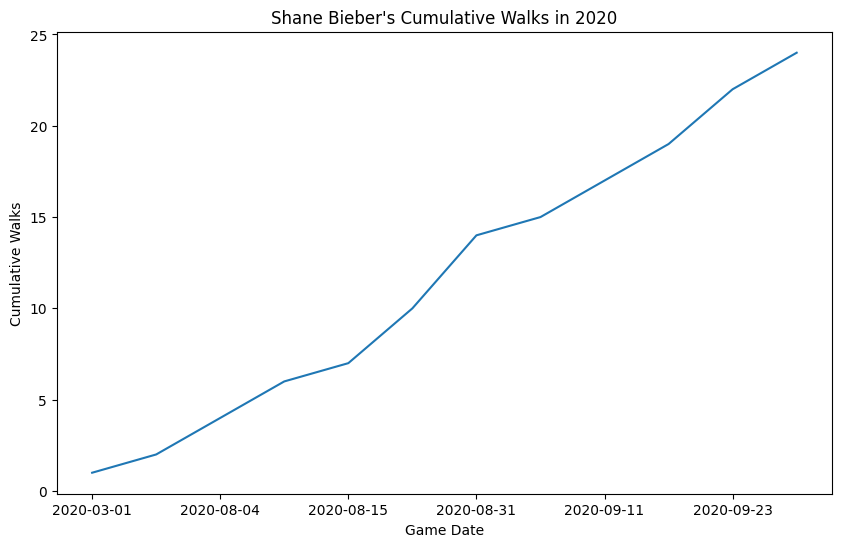


Result:
Plotted Shane Bieber's cumulative walks for each game in the 2020 season.

Summarizing execution result
{'Execute': {'messages': [HumanMessage(content='plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season.', name='User'), AIMessage(content='Here is the plan to plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season:\n\n1. Import the statcast_pitcher and playerid_lookup functions from pybaseball:\n\n```python\nfrom pybaseball import statcast_pitcher, playerid_lookup\n```\n\n2. Look up Shane Bieber\'s MLBAM player ID:\n\n```python\nbieber_id = playerid_lookup(\'bieber\', \'shane\')\nbieber_mlbam_id = bieber_id[\'key_mlbam\'][0]\n```\n\n3. Get Shane Bieber\'s statcast pitching data for the 2020 season: \n\n```python\nbieber_2020_data = statcast_pitcher(\'2020-01-01\', \'2020-12-31\', player_id=bieber_mlbam_id)\n```\n\n4. Filter to only pitches that resulted in walks, group by game date, and calculate the cumulative sum:\n\n```p

In [6]:
task = "looks good"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [7]:
task = "yes, thanks"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [HumanMessage(content='plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season.', name='User'), AIMessage(content='Here is the plan to plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season:\n\n1. Import the statcast_pitcher and playerid_lookup functions from pybaseball:\n\n```python\nfrom pybaseball import statcast_pitcher, playerid_lookup\n```\n\n2. Look up Shane Bieber\'s MLBAM player ID:\n\n```python\nbieber_id = playerid_lookup(\'bieber\', \'shane\')\nbieber_mlbam_id = bieber_id[\'key_mlbam\'][0]\n```\n\n3. Get Shane Bieber\'s statcast pitching data for the 2020 season: \n\n```python\nbieber_2020_data = statcast_pitcher(\'2020-01-01\', \'2020-12-31\', player_id=bieber_mlbam_id)\n```\n\n4. Filter to only pitches that resulted in walks, group by game date, and calculate the cumulative sum:\n\n```python \nbieber_2020_walks = bieber_2020_data[bieber_2020_data[\'event